## Week 4: Kernels and SVMs

This week we will study how one can efficiently learn classifier on complex datasets without the need to store large vectors of features. We will also learn a new family of classifiers, known as 'Maximal margin classifiers' or 'Support Vector Machines'. For each of the datasets below. You will be asked to learn the classifier and then to plot the regions using meshgrid and appropriate coloring.  

### Exercise 0. Gaussian discriminant analysis 

Using the formulas for the mean, variance and class prior proability, fit a Linear discriminant classifier to the dataset store in the variables 'X{k}Class{k}_LDA' for $k=1,2$.


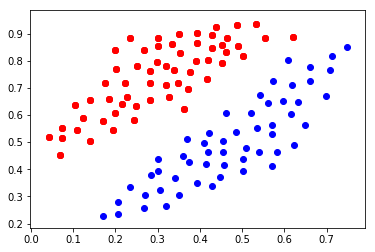

In [21]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np



X1Class1_LDA = sio.loadmat('X1Class1_LDA.mat')['X1Class1_LDA']
X2Class1_LDA = sio.loadmat('X2Class1_LDA.mat')['X2Class1_LDA']
X1Class2_LDA = sio.loadmat('X1Class2_LDA.mat')['X1Class2_LDA']
X2Class2_LDA = sio.loadmat('X2Class2_LDA.mat')['X2Class2_LDA']

plt.scatter(X1Class1_LDA,X2Class1_LDA, c = 'r')
plt.scatter(X1Class2_LDA,X2Class2_LDA, c = 'b')

plt.show()

### Exercise I. A simple dataset

Consider the dataset given below (you will need to load the variables 'X1Class1_Ex0', 'X2Class1_Ex0', and 'X1Class2_Ex0', 'X2Class2_Ex0').  

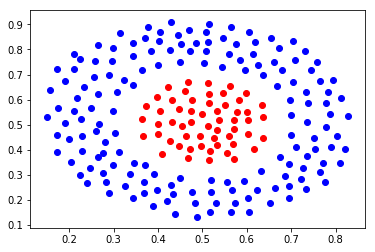

In [9]:
import scipy.io as sio
import matplotlib.pyplot as plt



X1Class1_Ex0 = sio.loadmat('X1Class1_Ex0.mat')['X1Class1_Ex0']
X2Class1_Ex0 = sio.loadmat('X2Class1_Ex0.mat')['X2Class1_Ex0']
X1Class2_Ex0 = sio.loadmat('X1Class2_Ex0.mat')['X1Class2_Ex0']
X2Class2_Ex0 = sio.loadmat('X2Class2_Ex0.mat')['X2Class2_Ex0']


plt.scatter(X1Class1_Ex0,X2Class1_Ex0, c = 'r')
plt.scatter(X1Class2_Ex0,X2Class2_Ex0, c = 'b')

plt.show()

### Exercise I.1  Back to the feature space..

What would be a good transformation to apply to the points to make them linearly separable? Define the resulting feature vector (you don't need more than $3$ features in this case). 

In [ ]:
import numpy as np




### Exercise I.2  From features to kernel

__Exercise I.2.1.__ Instead of explicitely building the feature vector, we now want to work with a kernel. What kernel could we use to encode similarity of the points? Define the kernel below

In [ ]:
import numpy as np

def myKernel(X):
    
    '''The function myKernel should return the matrix encoding the similarity between the points'''
    
    
    
    
    return kernel_mat


__Exercise I.2.2.__ A kernel is called 'Mercer' if its Gram matrix $\kappa(\mathbf{x}, \mathbf{x}')$ can be shown to be __positive semidefinite__ for any possible set of input pairs $(\mathbf{x}, \mathbf{x}')$. When the kernel is Mercer, it is possible to find a decomposition of the form $K = \mathbf{U}\Lambda \mathbf{U}^*$ for the Gram matrix. For such a decomposition in particular, if we define the vectors $\phi(\mathbf{x})$ as $\varphi(\mathbf{x}) = \Lambda^{1/2}\mathbf{U}_{:,i}$ where $\mathbf{U}_{i,:}$ is the $i^{th}$ column of the matrix $\mathbf{U}$, we have $\kappa_{ij} = \varphi(\mathbf{x}_i)^T\varphi(\mathbf{x}_j)$. In other words, if the Kernel is mercer, we can recover feature vectors $\varphi(x)$ such that $\kappa(\mathbf{x}, \mathbf{x}') = \varphi(x)\varphi(x')^T$. We would like to write a short function which takes as input the Gram matrix associated to a kernel, and return the corresponding feature vectors.

In [ ]:
import numpy as np

def Gram_is_Mercer(X):
    
    '''The function mykernel should return the matrix encoding the similarity between the points'''
    
    
    
    
    return phi

### Exercise I.3.  

We now consider a more difficult dataset (see below after loading the variables through github). 

- Start by using a few polynomial features $(x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^3, x_2^3,...)$ and learn the classifier through OLS. Use the module 'PolynomialFeatures' from scikit learn, together with the linear regression model. Then classify the points depending on their signs (+1/-1) or if you choose a 0/1 coding scheme put the discriminant bounday at 1/2.

- As a second step, we want to learn a max margin classifier for that dataset. Start by using the linear_SVC module. What do you notice?

- The SVC function associated to the svm module in scikit learn lets you choose among the following three kernels (on top of the linear model): polynomial, rbf and sigmoid. Start with the RBF kernel. Try different values for the parameters $\gamma$ and plot the resulting boundary. 

- Once you have tried a few values for $\gamma$ with the RBF kernel, see what you can get with the polynomial and sigmoid kernels.  

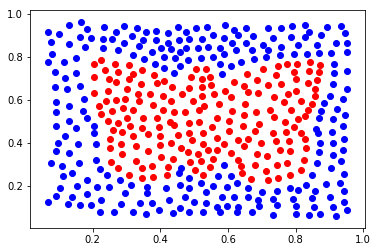

In [10]:
import scipy.io as sio
import matplotlib.pyplot as plt



X1Class1_Ex1 = sio.loadmat('X1Class1_Ex1.mat')['X1Class1']
X2Class1_Ex1 = sio.loadmat('X2Class1_Ex1.mat')['X2Class1']
X1Class2_Ex1 = sio.loadmat('X1Class2_Ex1.mat')['X1Class2']
X2Class2_Ex1 = sio.loadmat('X2Class2_Ex1.mat')['X2Class2']


plt.scatter(X1Class1_Ex1,X2Class1_Ex1, c = 'r')
plt.scatter(X1Class2_Ex1,X2Class2_Ex1, c = 'b')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

'''Put your code below. First fit the dataset by explicitely defining polynomial features.'''


### Exercise II. Face recognition, Part 1


#### Exercise II.1 
In this exercise, we will use the SVC classifier to do face recognition. Start by loading the dataset by using the lines below. Display some of the images using plt.imshow(). Display a couple of images with their corresponding targets.

In [ ]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print (faces.DESCR)

#### Exercise II.2 
Start by splitting your dataset between a training part and a test part (the training part should be roughly 90% of the data). We will keep the test set on the side to evaluate the result of our classifier once it has been trained on the data. Use the function 'train_test_split'

In [ ]:
from sklearn.model_selection import train_test_split

#### Exercise II.3 

Working with the images directly will be too expensive. We will instead first compute a compressed representation of the images through Principal Component Analysis (PCA). PCA will take as input the collection of all images and will extract a subset of $K$ images encoding most of the variation across the whole set. We will then represent each image as 
$$I = \alpha_1 B_1 + \alpha_2 B_2 + \ldots \alpha_K B_K$$

where the $\left\{B_k\right\}_{k=1}^K$ is the basis of 'eigen faces' returned by PCA. This step can be done through the PCA module of scikit learn. The eigenfaces are learned by fitting the PCA object to our face dataset and tehn using a call to the .components function. 

Once we have the eigenfaces, we can compute the compressed representation of each face in this reduced basis by using the .transform function.

Complete the code below to 

In [ ]:
from sklearn.decomposition import PCA


# You 


n_components = 150

# complete the lines below to get the eigenfaces. You should replace the variable 'faceMatrix'

pca = PCA(n_components=n_components, svd_solver='randomized').fit(faceMatrix)
eigenfaces = pca.components((n_components, h, w))


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Exercise II.4 

Now fit the SVM classifier to the feature vectors $(\alpha_1, \alpha_2, \ldots, \alpha_K)$ you just generated to represent the images. An SVC classifier based on the RBF kernel comes with two parameters: the width of the kernel ('gamma' in the lines below) and the weight of the $\ell_2$ regularization (see documentation). Determining good values for those parameters might be tricky. Fortunately, scikit learn provides a very convenient 'model_selection' module which provides the function 'GridSearchCV'. This function enables you to provide a grid of parameter values on which to compute the quality of your classifier. You can then use the function '.best_estimator_' to determine the optimal pair of parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)

optimal_pair = clf.best_estimator_

#### Exercise II.5 
Apply the classifier to the images and compute the validation error on the test set.

### Exercise III. Face recognition, Part 2

Now that we have trained our support vector classifier, we would like to compare your results with a logistic regression classifier. Using the same principal component decomposition for the images, fit this new classifier to your data. Now compare the result with the SVM classifier. What do you observe?

In [ ]:
from sklearn.linear_model import LogisticRegression

